**Import Data**

In [1]:
# import appropriate packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# read the excel file
# had to install the xlrd package to read the file 
df = pd.read_csv("../csv_files/p3final.csv", index_col=0)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.207673,0.471242,0.534307,0.617569,0.567375,0.462525,0.729701,0.478776,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,0.147494,1.000000,0.545709,0.521720,0.489104,0.271483,0.817120,0.474754,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,0.078383,0.406077,0.524798,0.622040,0.773408,1.000000,0.569904,0.514761,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,0.084319,0.396940,0.268780,0.694834,0.769738,1.000000,0.621831,0.660248,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,0.729255,0.453073,0.394649,0.424900,0.411101,0.420367,0.769835,0.504014,1.0,0


In [3]:
# filter out Y1 and Y2 (our targets)
df = df.drop(['I1','I2','I3','pIPO','pH','pL','p1day','Pmid'],axis=1)
df.head()

,Y1,Y2,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,0,1,0.458312,0.630418,0.788811,0.207673,0.471242,0.534307,0.617569,0.567375,0.462525,0.729701,0.478776,1.0,0
1,1,0,1.000000,0.384735,0.000000,0.147494,1.000000,0.545709,0.521720,0.489104,0.271483,0.817120,0.474754,0.0,1
2,1,0,0.327366,0.582011,0.000000,0.078383,0.406077,0.524798,0.622040,0.773408,1.000000,0.569904,0.514761,1.0,1
3,1,1,0.814322,0.578004,0.000000,0.084319,0.396940,0.268780,0.694834,0.769738,1.000000,0.621831,0.660248,1.0,1
4,0,1,0.286445,0.259982,0.529150,0.729255,0.453073,0.394649,0.424900,0.411101,0.420367,0.769835,0.504014,1.0,0


**Correlation**

In [4]:
#Want to see the correlation of every variable using the Spearman method 
df.corr(method='spearman')

,Y1,Y2,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
Y1,1.000000,-0.245474,0.052858,-0.070241,-0.743819,-0.018994,-0.060019,0.074537,0.113896,0.127200,0.097887,0.166401,0.059865,-0.071471,0.114894
Y2,-0.245474,1.000000,-0.049464,0.100964,0.282056,-0.067899,0.065131,-0.015157,-0.006811,0.028151,-0.050255,-0.098068,0.049881,0.044402,0.033920
C1,0.052858,-0.049464,1.000000,0.091492,-0.069293,0.050894,0.022686,0.052319,-0.055094,0.035825,0.032218,0.047255,-0.026662,0.006591,-0.035201
C4,-0.070241,0.100964,0.091492,1.000000,0.093001,0.019284,-0.046633,0.082483,0.051428,0.052780,-0.000640,0.000588,0.035177,-0.031654,0.013024
C6p,-0.743819,0.282056,-0.069293,0.093001,1.000000,-0.057830,0.121294,-0.022883,-0.028941,-0.084913,-0.076183,-0.117510,-0.032194,0.112737,-0.103513
C7,-0.018994,-0.067899,0.050894,0.019284,-0.057830,1.000000,-0.034356,0.102612,-0.131195,-0.132733,0.078212,0.177792,-0.084795,0.179596,-0.280032
C5p,-0.060019,0.065131,0.022686,-0.046633,0.121294,-0.034356,1.000000,0.110235,0.103796,0.127324,-0.004776,-0.059314,0.069516,0.145245,0.013675
T4p,0.074537,-0.015157,0.052319,0.082483,-0.022883,0.102612,0.110235,1.000000,-0.130725,-0.113779,0.054696,-0.042672,-0.105376,0.049221,-0.053776
T3p,0.113896,-0.006811,-0.055094,0.051428,-0.028941,-0.131195,0.103796,-0.130725,1.000000,0.455179,0.180490,0.074689,0.370718,0.013022,0.135337
T5p,0.127200,0.028151,0.035825,0.052780,-0.084913,-0.132733,0.127324,-0.113779,0.455179,1.000000,0.175430,0.154549,0.406917,0.122716,0.233608


In [5]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_1 = df.corr(method='spearman')['Y1'] > 0.2
Target_1

Y1      True
Y2     False
C1     False
C4     False
C6p    False
C7     False
C5p    False
T4p    False
T3p    False
T5p    False
S1p    False
S2p    False
S3p    False
C2     False
C3p    False
Name: Y1, dtype: bool

In [6]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_2 = df.corr(method='spearman')['Y2'] > 0.2
Target_2

Y1     False
Y2      True
C1     False
C4     False
C6p     True
C7     False
C5p    False
T4p    False
T3p    False
T5p    False
S1p    False
S2p    False
S3p    False
C2     False
C3p    False
Name: Y2, dtype: bool

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

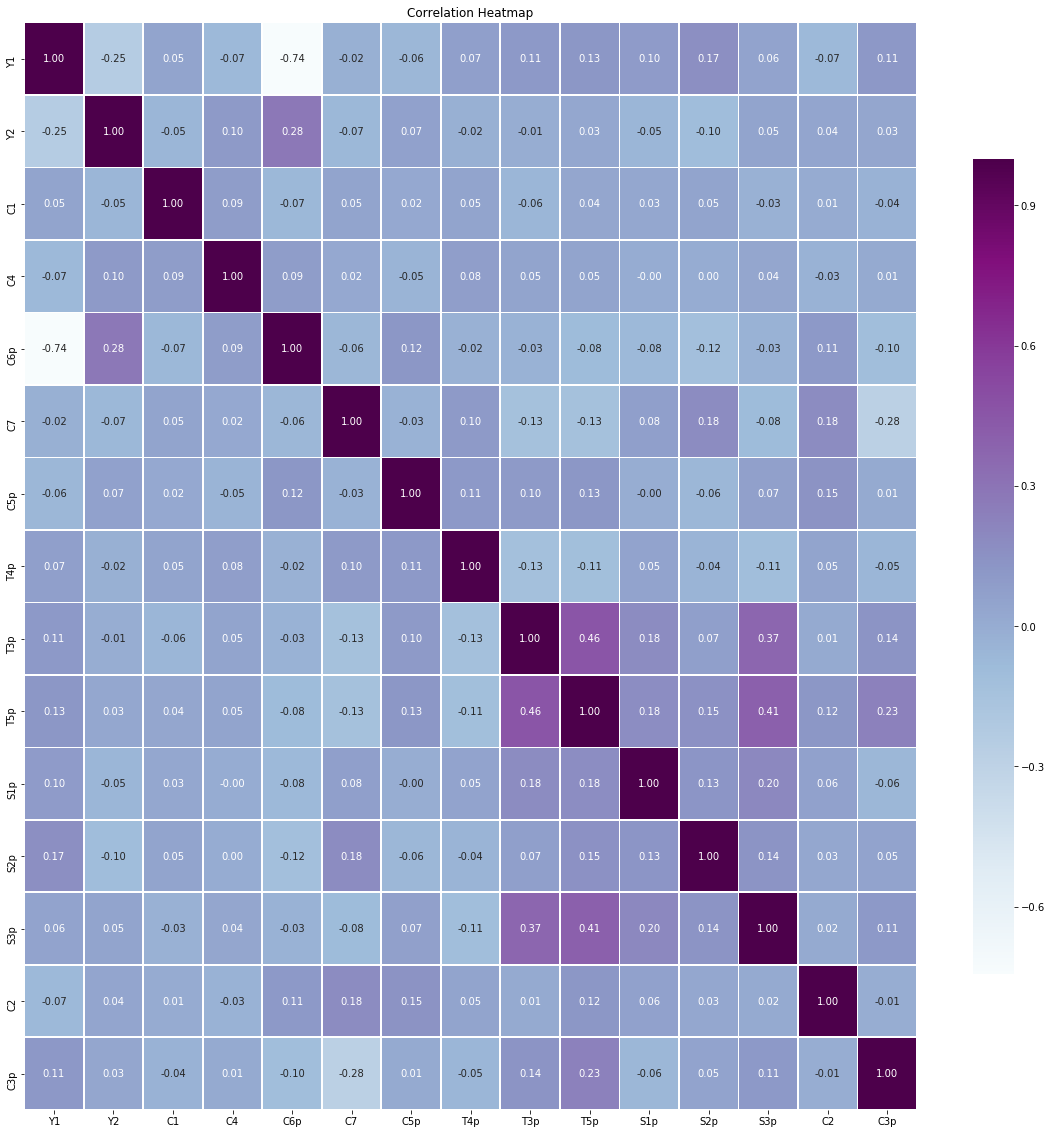

In [7]:
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [8]:
df.to_csv('../csv_files/p3correlation.csv')